In [2]:
from scipy.io.wavfile import read as wavread
import numpy as np
import os.path
import librosa.core
from tqdm import tqdm
import wget
from scipy.io.wavfile import read as wavread
import scipy.misc
%matplotlib inline
from matplotlib import pyplot as plt


Introduction:
The Constant Q transform is similar to the Fourier Trasnform, but the evaluated frequencies are logarithmic.
It is better for sound processing, since the frequency resolution of the human ear is also logarithmic.


We would like to process guitar sounds, which - in case of the accoustic guitar - plays notes between 82.41 Hz and 659.28Hz (3 octaves). 
We would like to distinguish and detect each note, which needs a quater tone frequency resolution. However, at low frequencies it needs a very long dataset to have such a good resolution. Thus, we aim for half tone frequency resolution in the lowest freqencies. Our expectations are that the harmonics of low frequency sounds will help us to distinguish between low frequency notes, so having a bad frequency resolution in the lowest freqency range may not be such a problem.

To determine the sample length to detect half a tone differency at the lowest frequencies, we use the equation

$$ N = \frac {S}  {\delta f} $$

Where S is the sample rate, $ \delta f $ is the frequency resolution.

In our case, we would like to have a half a tone resolution at 82.41Hz, which is the lowest frequency of the standard guitar tuning. Thus the sample length needed is:

$$ N = \frac {S} { ( 2^{2/12} - 2^{1/12}) * 82.41}  = \frac {S} {5.19 \text{Hz}} $$
Which means that we will need a sample with a length of 200 ms to have that frequency resolution.

Assuming a 44.1 kHz source, which we will rebin to 22.05 Hz ( to lower noise), a sample with a length of 4249 length will be needed.
We will use a sample length of 4096 to keep the sample length a power of 2.
(This will give us a slightly lower resolution.)

We will calculate the CQT in a 5 octave interval to capture the harmonics of high pitches. The resolution of the CQT transform should be 24 notes per octave.

In [28]:
fMin = 82.41
hopSize = 4096
nOctave = 5
nBins = 5*24
nBinsPerOctave = 24

We will now download a waw file and calculate the CQT transform of the first 30 seconds. (Note: The sample rate of the waw is alreasy 22.05 kHz)

In [21]:
fileName = "africa-toto.wav"
wget.download("http://www.ee.columbia.edu/~dpwe/sounds/music/africa-toto.wav", fileName)

  0% [                                                                        ]        0 / 13140922

  0% [                                                                        ]     8192 / 13140922

  0% [                                                                        ]    16384 / 13140922

  0% [                                                                        ]    24576 / 13140922

  0% [                                                                        ]    32768 / 13140922

  0% [                                                                        ]    40960 / 13140922

  0% [                                                                        ]    49152 / 13140922

  0% [                                                                        ]    57344 / 13140922

  0% [                                                                        ]    65536 / 13140922

  0% [                                                                        ]    73728 / 13140922

  0% [                                                                        ]    81920 / 13140922

  0% [                                                                        ]    90112 / 13140922

  0% [                                                                        ]    98304 / 13140922

  0% [                                                                        ]   106496 / 13140922

  0% [                                                                        ]   114688 / 13140922

  0% [                                                                        ]   122880 / 13140922

  0% [                                                                        ]   131072 / 13140922

  1% [                                                                        ]   139264 / 13140922

  1% [                                                                        ]   147456 / 13140922

  1% [                                                                        ]   155648 / 13140922

  1% [                                                                        ]   163840 / 13140922

  1% [                                                                        ]   172032 / 13140922

  1% [                                                                        ]   180224 / 13140922

  1% [.                                                                       ]   188416 / 13140922

  1% [.                                                                       ]   196608 / 13140922

  1% [.                                                                       ]   204800 / 13140922

  1% [.                                                                       ]   212992 / 13140922

  1% [.                                                                       ]   221184 / 13140922

  1% [.                                                                       ]   229376 / 13140922

  1% [.                                                                       ]   237568 / 13140922

  1% [.                                                                       ]   245760 / 13140922

  1% [.                                                                       ]   253952 / 13140922

  1% [.                                                                       ]   262144 / 13140922

  2% [.                                                                       ]   270336 / 13140922

  2% [.                                                                       ]   278528 / 13140922

  2% [.                                                                       ]   286720 / 13140922

  2% [.                                                                       ]   294912 / 13140922

  2% [.                                                                       ]   303104 / 13140922

  2% [.                                                                       ]   311296 / 13140922

  2% [.                                                                       ]   319488 / 13140922

  2% [.                                                                       ]   327680 / 13140922

  2% [.                                                                       ]   335872 / 13140922

  2% [.                                                                       ]   344064 / 13140922

  2% [.                                                                       ]   352256 / 13140922

  2% [.                                                                       ]   360448 / 13140922

  2% [..                                                                      ]   368640 / 13140922

  2% [..                                                                      ]   376832 / 13140922

  2% [..                                                                      ]   385024 / 13140922

  2% [..                                                                      ]   393216 / 13140922

  3% [..                                                                      ]   401408 / 13140922

  3% [..                                                                      ]   409600 / 13140922

  3% [..                                                                      ]   417792 / 13140922

  3% [..                                                                      ]   425984 / 13140922

  3% [..                                                                      ]   434176 / 13140922

  3% [..                                                                      ]   442368 / 13140922

  3% [..                                                                      ]   450560 / 13140922

  3% [..                                                                      ]   458752 / 13140922

  3% [..                                                                      ]   466944 / 13140922

  3% [..                                                                      ]   475136 / 13140922

  3% [..                                                                      ]   483328 / 13140922

  3% [..                                                                      ]   491520 / 13140922

  3% [..                                                                      ]   499712 / 13140922

  3% [..                                                                      ]   507904 / 13140922

  3% [..                                                                      ]   516096 / 13140922

  3% [..                                                                      ]   524288 / 13140922

  4% [..                                                                      ]   532480 / 13140922

  4% [..                                                                      ]   540672 / 13140922

  4% [...                                                                     ]   548864 / 13140922

  4% [...                                                                     ]   557056 / 13140922

  4% [...                                                                     ]   565248 / 13140922

  4% [...                                                                     ]   573440 / 13140922

  4% [...                                                                     ]   581632 / 13140922

  4% [...                                                                     ]   589824 / 13140922

  4% [...                                                                     ]   598016 / 13140922

  4% [...                                                                     ]   606208 / 13140922

  4% [...                                                                     ]   614400 / 13140922

  4% [...                                                                     ]   622592 / 13140922

  4% [...                                                                     ]   630784 / 13140922

  4% [...                                                                     ]   638976 / 13140922

  4% [...                                                                     ]   647168 / 13140922

  4% [...                                                                     ]   655360 / 13140922

  5% [...                                                                     ]   663552 / 13140922

  5% [...                                                                     ]   671744 / 13140922

  5% [...                                                                     ]   679936 / 13140922

  5% [...                                                                     ]   688128 / 13140922

  5% [...                                                                     ]   696320 / 13140922

  5% [...                                                                     ]   704512 / 13140922

  5% [...                                                                     ]   712704 / 13140922

  5% [...                                                                     ]   720896 / 13140922

  5% [...                                                                     ]   729088 / 13140922

  5% [....                                                                    ]   737280 / 13140922

  5% [....                                                                    ]   745472 / 13140922

  5% [....                                                                    ]   753664 / 13140922

  5% [....                                                                    ]   761856 / 13140922

  5% [....                                                                    ]   770048 / 13140922

  5% [....                                                                    ]   778240 / 13140922

  5% [....                                                                    ]   786432 / 13140922

  6% [....                                                                    ]   794624 / 13140922

  6% [....                                                                    ]   802816 / 13140922

  6% [....                                                                    ]   811008 / 13140922

  6% [....                                                                    ]   819200 / 13140922

  6% [....                                                                    ]   827392 / 13140922

  6% [....                                                                    ]   835584 / 13140922

  6% [....                                                                    ]   843776 / 13140922

  6% [....                                                                    ]   851968 / 13140922

  6% [....                                                                    ]   860160 / 13140922

  6% [....                                                                    ]   868352 / 13140922

  6% [....                                                                    ]   876544 / 13140922

  6% [....                                                                    ]   884736 / 13140922

  6% [....                                                                    ]   892928 / 13140922

  6% [....                                                                    ]   901120 / 13140922

  6% [....                                                                    ]   909312 / 13140922

  6% [.....                                                                   ]   917504 / 13140922

  7% [.....                                                                   ]   925696 / 13140922

  7% [.....                                                                   ]   933888 / 13140922

  7% [.....                                                                   ]   942080 / 13140922

  7% [.....                                                                   ]   950272 / 13140922

  7% [.....                                                                   ]   958464 / 13140922

  7% [.....                                                                   ]   966656 / 13140922

  7% [.....                                                                   ]   974848 / 13140922

  7% [.....                                                                   ]   983040 / 13140922

  7% [.....                                                                   ]   991232 / 13140922

  7% [.....                                                                   ]   999424 / 13140922

  7% [.....                                                                   ]  1007616 / 13140922

  7% [.....                                                                   ]  1015808 / 13140922

  7% [.....                                                                   ]  1024000 / 13140922

  7% [.....                                                                   ]  1032192 / 13140922

  7% [.....                                                                   ]  1040384 / 13140922

  7% [.....                                                                   ]  1048576 / 13140922

  8% [.....                                                                   ]  1056768 / 13140922

  8% [.....                                                                   ]  1064960 / 13140922

  8% [.....                                                                   ]  1073152 / 13140922

  8% [.....                                                                   ]  1081344 / 13140922

  8% [.....                                                                   ]  1089536 / 13140922

  8% [......                                                                  ]  1097728 / 13140922

  8% [......                                                                  ]  1105920 / 13140922

  8% [......                                                                  ]  1114112 / 13140922

  8% [......                                                                  ]  1122304 / 13140922

  8% [......                                                                  ]  1130496 / 13140922

  8% [......                                                                  ]  1138688 / 13140922

  8% [......                                                                  ]  1146880 / 13140922

  8% [......                                                                  ]  1155072 / 13140922

  8% [......                                                                  ]  1163264 / 13140922

  8% [......                                                                  ]  1171456 / 13140922

  8% [......                                                                  ]  1179648 / 13140922

  9% [......                                                                  ]  1187840 / 13140922

  9% [......                                                                  ]  1196032 / 13140922

  9% [......                                                                  ]  1204224 / 13140922

  9% [......                                                                  ]  1212416 / 13140922

  9% [......                                                                  ]  1220608 / 13140922

  9% [......                                                                  ]  1228800 / 13140922

  9% [......                                                                  ]  1236992 / 13140922

  9% [......                                                                  ]  1245184 / 13140922

  9% [......                                                                  ]  1253376 / 13140922

  9% [......                                                                  ]  1261568 / 13140922

  9% [......                                                                  ]  1269760 / 13140922

  9% [.......                                                                 ]  1277952 / 13140922

  9% [.......                                                                 ]  1286144 / 13140922

  9% [.......                                                                 ]  1294336 / 13140922

  9% [.......                                                                 ]  1302528 / 13140922

  9% [.......                                                                 ]  1310720 / 13140922

 10% [.......                                                                 ]  1318912 / 13140922

 10% [.......                                                                 ]  1327104 / 13140922

 10% [.......                                                                 ]  1335296 / 13140922

 10% [.......                                                                 ]  1343488 / 13140922

 10% [.......                                                                 ]  1351680 / 13140922

 10% [.......                                                                 ]  1359872 / 13140922

 10% [.......                                                                 ]  1368064 / 13140922

 10% [.......                                                                 ]  1376256 / 13140922

 10% [.......                                                                 ]  1384448 / 13140922

 10% [.......                                                                 ]  1392640 / 13140922

 10% [.......                                                                 ]  1400832 / 13140922

 10% [.......                                                                 ]  1409024 / 13140922

 10% [.......                                                                 ]  1417216 / 13140922

 10% [.......                                                                 ]  1425408 / 13140922

 10% [.......                                                                 ]  1433600 / 13140922

 10% [.......                                                                 ]  1441792 / 13140922

 11% [.......                                                                 ]  1449984 / 13140922

 11% [.......                                                                 ]  1458176 / 13140922

 11% [........                                                                ]  1466368 / 13140922

 11% [........                                                                ]  1474560 / 13140922

 11% [........                                                                ]  1482752 / 13140922

 11% [........                                                                ]  1490944 / 13140922

 11% [........                                                                ]  1499136 / 13140922

 11% [........                                                                ]  1507328 / 13140922

 11% [........                                                                ]  1515520 / 13140922

 11% [........                                                                ]  1523712 / 13140922

 11% [........                                                                ]  1531904 / 13140922

 11% [........                                                                ]  1540096 / 13140922

 11% [........                                                                ]  1548288 / 13140922

 11% [........                                                                ]  1556480 / 13140922

 11% [........                                                                ]  1564672 / 13140922

 11% [........                                                                ]  1572864 / 13140922

 12% [........                                                                ]  1581056 / 13140922

 12% [........                                                                ]  1589248 / 13140922

 12% [........                                                                ]  1597440 / 13140922

 12% [........                                                                ]  1605632 / 13140922

 12% [........                                                                ]  1613824 / 13140922

 12% [........                                                                ]  1622016 / 13140922

 12% [........                                                                ]  1630208 / 13140922

 12% [........                                                                ]  1638400 / 13140922

 12% [.........                                                               ]  1646592 / 13140922

 12% [.........                                                               ]  1654784 / 13140922

 12% [.........                                                               ]  1662976 / 13140922

 12% [.........                                                               ]  1671168 / 13140922

 12% [.........                                                               ]  1679360 / 13140922

 12% [.........                                                               ]  1687552 / 13140922

 12% [.........                                                               ]  1695744 / 13140922

 12% [.........                                                               ]  1703936 / 13140922

 13% [.........                                                               ]  1712128 / 13140922

 13% [.........                                                               ]  1720320 / 13140922

 13% [.........                                                               ]  1728512 / 13140922

 13% [.........                                                               ]  1736704 / 13140922

 13% [.........                                                               ]  1744896 / 13140922

 13% [.........                                                               ]  1753088 / 13140922

 13% [.........                                                               ]  1761280 / 13140922

 13% [.........                                                               ]  1769472 / 13140922

 13% [.........                                                               ]  1777664 / 13140922

 13% [.........                                                               ]  1785856 / 13140922

 13% [.........                                                               ]  1794048 / 13140922

 13% [.........                                                               ]  1802240 / 13140922

 13% [.........                                                               ]  1810432 / 13140922

 13% [.........                                                               ]  1818624 / 13140922

 13% [..........                                                              ]  1826816 / 13140922

 13% [..........                                                              ]  1835008 / 13140922

 14% [..........                                                              ]  1843200 / 13140922

 14% [..........                                                              ]  1851392 / 13140922

 14% [..........                                                              ]  1859584 / 13140922

 14% [..........                                                              ]  1867776 / 13140922

 14% [..........                                                              ]  1875968 / 13140922

 14% [..........                                                              ]  1884160 / 13140922

 14% [..........                                                              ]  1892352 / 13140922

 14% [..........                                                              ]  1900544 / 13140922

 14% [..........                                                              ]  1908736 / 13140922

 14% [..........                                                              ]  1916928 / 13140922

 14% [..........                                                              ]  1925120 / 13140922

 14% [..........                                                              ]  1933312 / 13140922

 14% [..........                                                              ]  1941504 / 13140922

 14% [..........                                                              ]  1949696 / 13140922

 14% [..........                                                              ]  1957888 / 13140922

 14% [..........                                                              ]  1966080 / 13140922

 15% [..........                                                              ]  1974272 / 13140922

 15% [..........                                                              ]  1982464 / 13140922

 15% [..........                                                              ]  1990656 / 13140922

 15% [..........                                                              ]  1998848 / 13140922

 15% [..........                                                              ]  2007040 / 13140922

 15% [...........                                                             ]  2015232 / 13140922

 15% [...........                                                             ]  2023424 / 13140922

 15% [...........                                                             ]  2031616 / 13140922

 15% [...........                                                             ]  2039808 / 13140922

 15% [...........                                                             ]  2048000 / 13140922

 15% [...........                                                             ]  2056192 / 13140922

 15% [...........                                                             ]  2064384 / 13140922

 15% [...........                                                             ]  2072576 / 13140922

 15% [...........                                                             ]  2080768 / 13140922

 15% [...........                                                             ]  2088960 / 13140922

 15% [...........                                                             ]  2097152 / 13140922

 16% [...........                                                             ]  2105344 / 13140922

 16% [...........                                                             ]  2113536 / 13140922

 16% [...........                                                             ]  2121728 / 13140922

 16% [...........                                                             ]  2129920 / 13140922

 16% [...........                                                             ]  2138112 / 13140922

 16% [...........                                                             ]  2146304 / 13140922

 16% [...........                                                             ]  2154496 / 13140922

 16% [...........                                                             ]  2162688 / 13140922

 16% [...........                                                             ]  2170880 / 13140922

 16% [...........                                                             ]  2179072 / 13140922

 16% [...........                                                             ]  2187264 / 13140922

 16% [............                                                            ]  2195456 / 13140922

 16% [............                                                            ]  2203648 / 13140922

 16% [............                                                            ]  2211840 / 13140922

 16% [............                                                            ]  2220032 / 13140922

 16% [............                                                            ]  2228224 / 13140922

 17% [............                                                            ]  2236416 / 13140922

 17% [............                                                            ]  2244608 / 13140922

 17% [............                                                            ]  2252800 / 13140922

 17% [............                                                            ]  2260992 / 13140922

 17% [............                                                            ]  2269184 / 13140922

 17% [............                                                            ]  2277376 / 13140922

 17% [............                                                            ]  2285568 / 13140922

 17% [............                                                            ]  2293760 / 13140922

 17% [............                                                            ]  2301952 / 13140922

 17% [............                                                            ]  2310144 / 13140922

 17% [............                                                            ]  2318336 / 13140922

 17% [............                                                            ]  2326528 / 13140922

 17% [............                                                            ]  2334720 / 13140922

 17% [............                                                            ]  2342912 / 13140922

 17% [............                                                            ]  2351104 / 13140922

 17% [............                                                            ]  2359296 / 13140922

 18% [............                                                            ]  2367488 / 13140922

 18% [.............                                                           ]  2375680 / 13140922

 18% [.............                                                           ]  2383872 / 13140922

 18% [.............                                                           ]  2392064 / 13140922

 18% [.............                                                           ]  2400256 / 13140922

 18% [.............                                                           ]  2408448 / 13140922

 18% [.............                                                           ]  2416640 / 13140922

 18% [.............                                                           ]  2424832 / 13140922

 18% [.............                                                           ]  2433024 / 13140922

 18% [.............                                                           ]  2441216 / 13140922

 18% [.............                                                           ]  2449408 / 13140922

 18% [.............                                                           ]  2457600 / 13140922

 18% [.............                                                           ]  2465792 / 13140922

 18% [.............                                                           ]  2473984 / 13140922

 18% [.............                                                           ]  2482176 / 13140922

 18% [.............                                                           ]  2490368 / 13140922

 19% [.............                                                           ]  2498560 / 13140922

 19% [.............                                                           ]  2506752 / 13140922

 19% [.............                                                           ]  2514944 / 13140922

 19% [.............                                                           ]  2523136 / 13140922

 19% [.............                                                           ]  2531328 / 13140922

 19% [.............                                                           ]  2539520 / 13140922

 19% [.............                                                           ]  2547712 / 13140922

 19% [..............                                                          ]  2555904 / 13140922

 19% [..............                                                          ]  2564096 / 13140922

 19% [..............                                                          ]  2572288 / 13140922

 19% [..............                                                          ]  2580480 / 13140922

 19% [..............                                                          ]  2588672 / 13140922

 19% [..............                                                          ]  2596864 / 13140922

 19% [..............                                                          ]  2605056 / 13140922

 19% [..............                                                          ]  2613248 / 13140922

 19% [..............                                                          ]  2621440 / 13140922

 20% [..............                                                          ]  2629632 / 13140922

 20% [..............                                                          ]  2637824 / 13140922

 20% [..............                                                          ]  2646016 / 13140922

 20% [..............                                                          ]  2654208 / 13140922

 20% [..............                                                          ]  2662400 / 13140922

 20% [..............                                                          ]  2670592 / 13140922

 20% [..............                                                          ]  2678784 / 13140922

 20% [..............                                                          ]  2686976 / 13140922

 20% [..............                                                          ]  2695168 / 13140922

 20% [..............                                                          ]  2703360 / 13140922

 20% [..............                                                          ]  2711552 / 13140922

 20% [..............                                                          ]  2719744 / 13140922

 20% [..............                                                          ]  2727936 / 13140922

 20% [..............                                                          ]  2736128 / 13140922

 20% [...............                                                         ]  2744320 / 13140922

 20% [...............                                                         ]  2752512 / 13140922

 21% [...............                                                         ]  2760704 / 13140922

 21% [...............                                                         ]  2768896 / 13140922

 21% [...............                                                         ]  2777088 / 13140922

 21% [...............                                                         ]  2785280 / 13140922

 21% [...............                                                         ]  2793472 / 13140922

 21% [...............                                                         ]  2801664 / 13140922

 21% [...............                                                         ]  2809856 / 13140922

 21% [...............                                                         ]  2818048 / 13140922

 21% [...............                                                         ]  2826240 / 13140922

 21% [...............                                                         ]  2834432 / 13140922

 21% [...............                                                         ]  2842624 / 13140922

 21% [...............                                                         ]  2850816 / 13140922

 21% [...............                                                         ]  2859008 / 13140922

 21% [...............                                                         ]  2867200 / 13140922

 21% [...............                                                         ]  2875392 / 13140922

 21% [...............                                                         ]  2883584 / 13140922

 22% [...............                                                         ]  2891776 / 13140922

 22% [...............                                                         ]  2899968 / 13140922

 22% [...............                                                         ]  2908160 / 13140922

 22% [...............                                                         ]  2916352 / 13140922

 22% [................                                                        ]  2924544 / 13140922

 22% [................                                                        ]  2932736 / 13140922

 22% [................                                                        ]  2940928 / 13140922

 22% [................                                                        ]  2949120 / 13140922

 22% [................                                                        ]  2957312 / 13140922

 22% [................                                                        ]  2965504 / 13140922

 22% [................                                                        ]  2973696 / 13140922

 22% [................                                                        ]  2981888 / 13140922

 22% [................                                                        ]  2990080 / 13140922

 22% [................                                                        ]  2998272 / 13140922

 22% [................                                                        ]  3006464 / 13140922

 22% [................                                                        ]  3014656 / 13140922

 23% [................                                                        ]  3022848 / 13140922

 23% [................                                                        ]  3031040 / 13140922

 23% [................                                                        ]  3039232 / 13140922

 23% [................                                                        ]  3047424 / 13140922

 23% [................                                                        ]  3055616 / 13140922

 23% [................                                                        ]  3063808 / 13140922

 23% [................                                                        ]  3072000 / 13140922

 23% [................                                                        ]  3080192 / 13140922

 23% [................                                                        ]  3088384 / 13140922

 23% [................                                                        ]  3096576 / 13140922

 23% [.................                                                       ]  3104768 / 13140922

 23% [.................                                                       ]  3112960 / 13140922

 23% [.................                                                       ]  3121152 / 13140922

 23% [.................                                                       ]  3129344 / 13140922

 23% [.................                                                       ]  3137536 / 13140922

 23% [.................                                                       ]  3145728 / 13140922

 24% [.................                                                       ]  3153920 / 13140922

 24% [.................                                                       ]  3162112 / 13140922

 24% [.................                                                       ]  3170304 / 13140922

 24% [.................                                                       ]  3178496 / 13140922

 24% [.................                                                       ]  3186688 / 13140922

 24% [.................                                                       ]  3194880 / 13140922

 24% [.................                                                       ]  3203072 / 13140922

 24% [.................                                                       ]  3211264 / 13140922

 24% [.................                                                       ]  3219456 / 13140922

 24% [.................                                                       ]  3227648 / 13140922

 24% [.................                                                       ]  3235840 / 13140922

 24% [.................                                                       ]  3244032 / 13140922

 24% [.................                                                       ]  3252224 / 13140922

 24% [.................                                                       ]  3260416 / 13140922

 24% [.................                                                       ]  3268608 / 13140922

 24% [.................                                                       ]  3276800 / 13140922

 24% [.................                                                       ]  3284992 / 13140922

 25% [..................                                                      ]  3293184 / 13140922

 25% [..................                                                      ]  3301376 / 13140922

 25% [..................                                                      ]  3309568 / 13140922

 25% [..................                                                      ]  3317760 / 13140922

 25% [..................                                                      ]  3325952 / 13140922

 25% [..................                                                      ]  3334144 / 13140922

 25% [..................                                                      ]  3342336 / 13140922

 25% [..................                                                      ]  3350528 / 13140922

 25% [..................                                                      ]  3358720 / 13140922

 25% [..................                                                      ]  3366912 / 13140922

 25% [..................                                                      ]  3375104 / 13140922

 25% [..................                                                      ]  3383296 / 13140922

 25% [..................                                                      ]  3391488 / 13140922

 25% [..................                                                      ]  3399680 / 13140922

 25% [..................                                                      ]  3407872 / 13140922

 25% [..................                                                      ]  3416064 / 13140922

 26% [..................                                                      ]  3424256 / 13140922

 26% [..................                                                      ]  3432448 / 13140922

 26% [..................                                                      ]  3440640 / 13140922

 26% [..................                                                      ]  3448832 / 13140922

 26% [..................                                                      ]  3457024 / 13140922

 26% [..................                                                      ]  3465216 / 13140922

 26% [...................                                                     ]  3473408 / 13140922

 26% [...................                                                     ]  3481600 / 13140922

 26% [...................                                                     ]  3489792 / 13140922

 26% [...................                                                     ]  3497984 / 13140922

 26% [...................                                                     ]  3506176 / 13140922

 26% [...................                                                     ]  3514368 / 13140922

 26% [...................                                                     ]  3522560 / 13140922

 26% [...................                                                     ]  3530752 / 13140922

 26% [...................                                                     ]  3538944 / 13140922

 26% [...................                                                     ]  3547136 / 13140922

 27% [...................                                                     ]  3555328 / 13140922

 27% [...................                                                     ]  3563520 / 13140922

 27% [...................                                                     ]  3571712 / 13140922

 27% [...................                                                     ]  3579904 / 13140922

 27% [...................                                                     ]  3588096 / 13140922

 27% [...................                                                     ]  3596288 / 13140922

 27% [...................                                                     ]  3604480 / 13140922

 27% [...................                                                     ]  3612672 / 13140922

 27% [...................                                                     ]  3620864 / 13140922

 27% [...................                                                     ]  3629056 / 13140922

 27% [...................                                                     ]  3637248 / 13140922

 27% [...................                                                     ]  3645440 / 13140922

 27% [....................                                                    ]  3653632 / 13140922

 27% [....................                                                    ]  3661824 / 13140922

 27% [....................                                                    ]  3670016 / 13140922

 27% [....................                                                    ]  3678208 / 13140922

 28% [....................                                                    ]  3686400 / 13140922

 28% [....................                                                    ]  3694592 / 13140922

 28% [....................                                                    ]  3702784 / 13140922

 28% [....................                                                    ]  3710976 / 13140922

 28% [....................                                                    ]  3719168 / 13140922

 28% [....................                                                    ]  3727360 / 13140922

 28% [....................                                                    ]  3735552 / 13140922

 28% [....................                                                    ]  3743744 / 13140922

 28% [....................                                                    ]  3751936 / 13140922

 28% [....................                                                    ]  3760128 / 13140922

 28% [....................                                                    ]  3768320 / 13140922

 28% [....................                                                    ]  3776512 / 13140922

 28% [....................                                                    ]  3784704 / 13140922

 28% [....................                                                    ]  3792896 / 13140922

 28% [....................                                                    ]  3801088 / 13140922

 28% [....................                                                    ]  3809280 / 13140922

 29% [....................                                                    ]  3817472 / 13140922

 29% [....................                                                    ]  3825664 / 13140922

 29% [.....................                                                   ]  3833856 / 13140922

 29% [.....................                                                   ]  3842048 / 13140922

 29% [.....................                                                   ]  3850240 / 13140922

 29% [.....................                                                   ]  3858432 / 13140922

 29% [.....................                                                   ]  3866624 / 13140922

 29% [.....................                                                   ]  3874816 / 13140922

 29% [.....................                                                   ]  3883008 / 13140922

 29% [.....................                                                   ]  3891200 / 13140922

 29% [.....................                                                   ]  3899392 / 13140922

 29% [.....................                                                   ]  3907584 / 13140922

 29% [.....................                                                   ]  3915776 / 13140922

 29% [.....................                                                   ]  3923968 / 13140922

 29% [.....................                                                   ]  3932160 / 13140922

 29% [.....................                                                   ]  3940352 / 13140922

 30% [.....................                                                   ]  3948544 / 13140922

 30% [.....................                                                   ]  3956736 / 13140922

 30% [.....................                                                   ]  3964928 / 13140922

 30% [.....................                                                   ]  3973120 / 13140922

 30% [.....................                                                   ]  3981312 / 13140922

 30% [.....................                                                   ]  3989504 / 13140922

 30% [.....................                                                   ]  3997696 / 13140922

 30% [.....................                                                   ]  4005888 / 13140922

 30% [.....................                                                   ]  4014080 / 13140922

 30% [......................                                                  ]  4022272 / 13140922

 30% [......................                                                  ]  4030464 / 13140922

 30% [......................                                                  ]  4038656 / 13140922

 30% [......................                                                  ]  4046848 / 13140922

 30% [......................                                                  ]  4055040 / 13140922

 30% [......................                                                  ]  4063232 / 13140922

 30% [......................                                                  ]  4071424 / 13140922

 31% [......................                                                  ]  4079616 / 13140922

 31% [......................                                                  ]  4087808 / 13140922

 31% [......................                                                  ]  4096000 / 13140922

 31% [......................                                                  ]  4104192 / 13140922

 31% [......................                                                  ]  4112384 / 13140922

 31% [......................                                                  ]  4120576 / 13140922

 31% [......................                                                  ]  4128768 / 13140922

 31% [......................                                                  ]  4136960 / 13140922

 31% [......................                                                  ]  4145152 / 13140922

 31% [......................                                                  ]  4153344 / 13140922

 31% [......................                                                  ]  4161536 / 13140922

 31% [......................                                                  ]  4169728 / 13140922

 31% [......................                                                  ]  4177920 / 13140922

 31% [......................                                                  ]  4186112 / 13140922

 31% [......................                                                  ]  4194304 / 13140922

 31% [.......................                                                 ]  4202496 / 13140922

 32% [.......................                                                 ]  4210688 / 13140922

 32% [.......................                                                 ]  4218880 / 13140922

 32% [.......................                                                 ]  4227072 / 13140922

 32% [.......................                                                 ]  4235264 / 13140922

 32% [.......................                                                 ]  4243456 / 13140922

 32% [.......................                                                 ]  4251648 / 13140922

 32% [.......................                                                 ]  4259840 / 13140922

 32% [.......................                                                 ]  4268032 / 13140922

 32% [.......................                                                 ]  4276224 / 13140922

 32% [.......................                                                 ]  4284416 / 13140922

 32% [.......................                                                 ]  4292608 / 13140922

 32% [.......................                                                 ]  4300800 / 13140922

 32% [.......................                                                 ]  4308992 / 13140922

 32% [.......................                                                 ]  4317184 / 13140922

 32% [.......................                                                 ]  4325376 / 13140922

 32% [.......................                                                 ]  4333568 / 13140922

 33% [.......................                                                 ]  4341760 / 13140922

 33% [.......................                                                 ]  4349952 / 13140922

 33% [.......................                                                 ]  4358144 / 13140922

 33% [.......................                                                 ]  4366336 / 13140922

 33% [.......................                                                 ]  4374528 / 13140922

 33% [........................                                                ]  4382720 / 13140922

 33% [........................                                                ]  4390912 / 13140922

 33% [........................                                                ]  4399104 / 13140922

 33% [........................                                                ]  4407296 / 13140922

 33% [........................                                                ]  4415488 / 13140922

 33% [........................                                                ]  4423680 / 13140922

 33% [........................                                                ]  4431872 / 13140922

 33% [........................                                                ]  4440064 / 13140922

 33% [........................                                                ]  4448256 / 13140922

 33% [........................                                                ]  4456448 / 13140922

 33% [........................                                                ]  4464640 / 13140922

 34% [........................                                                ]  4472832 / 13140922

 34% [........................                                                ]  4481024 / 13140922

 34% [........................                                                ]  4489216 / 13140922

 34% [........................                                                ]  4497408 / 13140922

 34% [........................                                                ]  4505600 / 13140922

 34% [........................                                                ]  4513792 / 13140922

 34% [........................                                                ]  4521984 / 13140922

 34% [........................                                                ]  4530176 / 13140922

 34% [........................                                                ]  4538368 / 13140922

 34% [........................                                                ]  4546560 / 13140922

 34% [........................                                                ]  4554752 / 13140922

 34% [.........................                                               ]  4562944 / 13140922

 34% [.........................                                               ]  4571136 / 13140922

 34% [.........................                                               ]  4579328 / 13140922

 34% [.........................                                               ]  4587520 / 13140922

 34% [.........................                                               ]  4595712 / 13140922

 35% [.........................                                               ]  4603904 / 13140922

 35% [.........................                                               ]  4612096 / 13140922

 35% [.........................                                               ]  4620288 / 13140922

 35% [.........................                                               ]  4628480 / 13140922

 35% [.........................                                               ]  4636672 / 13140922

 35% [.........................                                               ]  4644864 / 13140922

 35% [.........................                                               ]  4653056 / 13140922

 35% [.........................                                               ]  4661248 / 13140922

 35% [.........................                                               ]  4669440 / 13140922

 35% [.........................                                               ]  4677632 / 13140922

 35% [.........................                                               ]  4685824 / 13140922

 35% [.........................                                               ]  4694016 / 13140922

 35% [.........................                                               ]  4702208 / 13140922

 35% [.........................                                               ]  4710400 / 13140922

 35% [.........................                                               ]  4718592 / 13140922

 35% [.........................                                               ]  4726784 / 13140922

 36% [.........................                                               ]  4734976 / 13140922

 36% [.........................                                               ]  4743168 / 13140922

 36% [..........................                                              ]  4751360 / 13140922

 36% [..........................                                              ]  4759552 / 13140922

 36% [..........................                                              ]  4767744 / 13140922

 36% [..........................                                              ]  4775936 / 13140922

 36% [..........................                                              ]  4784128 / 13140922

 36% [..........................                                              ]  4792320 / 13140922

 36% [..........................                                              ]  4800512 / 13140922

 36% [..........................                                              ]  4808704 / 13140922

 36% [..........................                                              ]  4816896 / 13140922

 36% [..........................                                              ]  4825088 / 13140922

 36% [..........................                                              ]  4833280 / 13140922

 36% [..........................                                              ]  4841472 / 13140922

 36% [..........................                                              ]  4849664 / 13140922

 36% [..........................                                              ]  4857856 / 13140922

 37% [..........................                                              ]  4866048 / 13140922

 37% [..........................                                              ]  4874240 / 13140922

 37% [..........................                                              ]  4882432 / 13140922

 37% [..........................                                              ]  4890624 / 13140922

 37% [..........................                                              ]  4898816 / 13140922

 37% [..........................                                              ]  4907008 / 13140922

 37% [..........................                                              ]  4915200 / 13140922

 37% [..........................                                              ]  4923392 / 13140922

 37% [...........................                                             ]  4931584 / 13140922

 37% [...........................                                             ]  4939776 / 13140922

 37% [...........................                                             ]  4947968 / 13140922

 37% [...........................                                             ]  4956160 / 13140922

 37% [...........................                                             ]  4964352 / 13140922

 37% [...........................                                             ]  4972544 / 13140922

 37% [...........................                                             ]  4980736 / 13140922

 37% [...........................                                             ]  4988928 / 13140922

 38% [...........................                                             ]  4997120 / 13140922

 38% [...........................                                             ]  5005312 / 13140922

 38% [...........................                                             ]  5013504 / 13140922

 38% [...........................                                             ]  5021696 / 13140922

 38% [...........................                                             ]  5029888 / 13140922

 38% [...........................                                             ]  5038080 / 13140922

 38% [...........................                                             ]  5046272 / 13140922

 38% [...........................                                             ]  5054464 / 13140922

 38% [...........................                                             ]  5062656 / 13140922

 38% [...........................                                             ]  5070848 / 13140922

 38% [...........................                                             ]  5079040 / 13140922

 38% [...........................                                             ]  5087232 / 13140922

 38% [...........................                                             ]  5095424 / 13140922

 38% [...........................                                             ]  5103616 / 13140922

 38% [............................                                            ]  5111808 / 13140922

 38% [............................                                            ]  5120000 / 13140922

 39% [............................                                            ]  5128192 / 13140922

 39% [............................                                            ]  5136384 / 13140922

 39% [............................                                            ]  5144576 / 13140922

 39% [............................                                            ]  5152768 / 13140922

 39% [............................                                            ]  5160960 / 13140922

 39% [............................                                            ]  5169152 / 13140922

 39% [............................                                            ]  5177344 / 13140922

 39% [............................                                            ]  5185536 / 13140922

 39% [............................                                            ]  5193728 / 13140922

 39% [............................                                            ]  5201920 / 13140922

 39% [............................                                            ]  5210112 / 13140922

 39% [............................                                            ]  5218304 / 13140922

 39% [............................                                            ]  5226496 / 13140922

 39% [............................                                            ]  5234688 / 13140922

 39% [............................                                            ]  5242880 / 13140922

 39% [............................                                            ]  5251072 / 13140922

 40% [............................                                            ]  5259264 / 13140922

 40% [............................                                            ]  5267456 / 13140922

 40% [............................                                            ]  5275648 / 13140922

 40% [............................                                            ]  5283840 / 13140922

 40% [............................                                            ]  5292032 / 13140922

 40% [.............................                                           ]  5300224 / 13140922

 40% [.............................                                           ]  5308416 / 13140922

 40% [.............................                                           ]  5316608 / 13140922

 40% [.............................                                           ]  5324800 / 13140922

 40% [.............................                                           ]  5332992 / 13140922

 40% [.............................                                           ]  5341184 / 13140922

 40% [.............................                                           ]  5349376 / 13140922

 40% [.............................                                           ]  5357568 / 13140922

 40% [.............................                                           ]  5365760 / 13140922

 40% [.............................                                           ]  5373952 / 13140922

 40% [.............................                                           ]  5382144 / 13140922

 41% [.............................                                           ]  5390336 / 13140922

 41% [.............................                                           ]  5398528 / 13140922

 41% [.............................                                           ]  5406720 / 13140922

 41% [.............................                                           ]  5414912 / 13140922

 41% [.............................                                           ]  5423104 / 13140922

 41% [.............................                                           ]  5431296 / 13140922

 41% [.............................                                           ]  5439488 / 13140922

 41% [.............................                                           ]  5447680 / 13140922

 41% [.............................                                           ]  5455872 / 13140922

 41% [.............................                                           ]  5464064 / 13140922

 41% [.............................                                           ]  5472256 / 13140922

 41% [..............................                                          ]  5480448 / 13140922

 41% [..............................                                          ]  5488640 / 13140922

 41% [..............................                                          ]  5496832 / 13140922

 41% [..............................                                          ]  5505024 / 13140922

 41% [..............................                                          ]  5513216 / 13140922

 42% [..............................                                          ]  5521408 / 13140922

 42% [..............................                                          ]  5529600 / 13140922

 42% [..............................                                          ]  5537792 / 13140922

 42% [..............................                                          ]  5545984 / 13140922

 42% [..............................                                          ]  5554176 / 13140922

 42% [..............................                                          ]  5562368 / 13140922

 42% [..............................                                          ]  5570560 / 13140922

 42% [..............................                                          ]  5578752 / 13140922

 42% [..............................                                          ]  5586944 / 13140922

 42% [..............................                                          ]  5595136 / 13140922

 42% [..............................                                          ]  5603328 / 13140922

 42% [..............................                                          ]  5611520 / 13140922

 42% [..............................                                          ]  5619712 / 13140922

 42% [..............................                                          ]  5627904 / 13140922

 42% [..............................                                          ]  5636096 / 13140922

 42% [..............................                                          ]  5644288 / 13140922

 43% [..............................                                          ]  5652480 / 13140922

 43% [...............................                                         ]  5660672 / 13140922

 43% [...............................                                         ]  5668864 / 13140922

 43% [...............................                                         ]  5677056 / 13140922

 43% [...............................                                         ]  5685248 / 13140922

 43% [...............................                                         ]  5693440 / 13140922

 43% [...............................                                         ]  5701632 / 13140922

 43% [...............................                                         ]  5709824 / 13140922

 43% [...............................                                         ]  5718016 / 13140922

 43% [...............................                                         ]  5726208 / 13140922

 43% [...............................                                         ]  5734400 / 13140922

 43% [...............................                                         ]  5742592 / 13140922

 43% [...............................                                         ]  5750784 / 13140922

 43% [...............................                                         ]  5758976 / 13140922

 43% [...............................                                         ]  5767168 / 13140922

 43% [...............................                                         ]  5775360 / 13140922

 44% [...............................                                         ]  5783552 / 13140922

 44% [...............................                                         ]  5791744 / 13140922

 44% [...............................                                         ]  5799936 / 13140922

 44% [...............................                                         ]  5808128 / 13140922

 44% [...............................                                         ]  5816320 / 13140922

 44% [...............................                                         ]  5824512 / 13140922

 44% [...............................                                         ]  5832704 / 13140922

 44% [................................                                        ]  5840896 / 13140922

 44% [................................                                        ]  5849088 / 13140922

 44% [................................                                        ]  5857280 / 13140922

 44% [................................                                        ]  5865472 / 13140922

 44% [................................                                        ]  5873664 / 13140922

 44% [................................                                        ]  5881856 / 13140922

 44% [................................                                        ]  5890048 / 13140922

 44% [................................                                        ]  5898240 / 13140922

 44% [................................                                        ]  5906432 / 13140922

 45% [................................                                        ]  5914624 / 13140922

 45% [................................                                        ]  5922816 / 13140922

 45% [................................                                        ]  5931008 / 13140922

 45% [................................                                        ]  5939200 / 13140922

 45% [................................                                        ]  5947392 / 13140922

 45% [................................                                        ]  5955584 / 13140922

 45% [................................                                        ]  5963776 / 13140922

 45% [................................                                        ]  5971968 / 13140922

 45% [................................                                        ]  5980160 / 13140922

 45% [................................                                        ]  5988352 / 13140922

 45% [................................                                        ]  5996544 / 13140922

 45% [................................                                        ]  6004736 / 13140922

 45% [................................                                        ]  6012928 / 13140922

 45% [................................                                        ]  6021120 / 13140922

 45% [.................................                                       ]  6029312 / 13140922

 45% [.................................                                       ]  6037504 / 13140922

 46% [.................................                                       ]  6045696 / 13140922

 46% [.................................                                       ]  6053888 / 13140922

 46% [.................................                                       ]  6062080 / 13140922

 46% [.................................                                       ]  6070272 / 13140922

 46% [.................................                                       ]  6078464 / 13140922

 46% [.................................                                       ]  6086656 / 13140922

 46% [.................................                                       ]  6094848 / 13140922

 46% [.................................                                       ]  6103040 / 13140922

 46% [.................................                                       ]  6111232 / 13140922

 46% [.................................                                       ]  6119424 / 13140922

 46% [.................................                                       ]  6127616 / 13140922

 46% [.................................                                       ]  6135808 / 13140922

 46% [.................................                                       ]  6144000 / 13140922

 46% [.................................                                       ]  6152192 / 13140922

 46% [.................................                                       ]  6160384 / 13140922

 46% [.................................                                       ]  6168576 / 13140922

 47% [.................................                                       ]  6176768 / 13140922

 47% [.................................                                       ]  6184960 / 13140922

 47% [.................................                                       ]  6193152 / 13140922

 47% [.................................                                       ]  6201344 / 13140922

 47% [..................................                                      ]  6209536 / 13140922

 47% [..................................                                      ]  6217728 / 13140922

 47% [..................................                                      ]  6225920 / 13140922

 47% [..................................                                      ]  6234112 / 13140922

 47% [..................................                                      ]  6242304 / 13140922

 47% [..................................                                      ]  6250496 / 13140922

 47% [..................................                                      ]  6258688 / 13140922

 47% [..................................                                      ]  6266880 / 13140922

 47% [..................................                                      ]  6275072 / 13140922

 47% [..................................                                      ]  6283264 / 13140922

 47% [..................................                                      ]  6291456 / 13140922

 47% [..................................                                      ]  6299648 / 13140922

 48% [..................................                                      ]  6307840 / 13140922

 48% [..................................                                      ]  6316032 / 13140922

 48% [..................................                                      ]  6324224 / 13140922

 48% [..................................                                      ]  6332416 / 13140922

 48% [..................................                                      ]  6340608 / 13140922

 48% [..................................                                      ]  6348800 / 13140922

 48% [..................................                                      ]  6356992 / 13140922

 48% [..................................                                      ]  6365184 / 13140922

 48% [..................................                                      ]  6373376 / 13140922

 48% [..................................                                      ]  6381568 / 13140922

 48% [...................................                                     ]  6389760 / 13140922

 48% [...................................                                     ]  6397952 / 13140922

 48% [...................................                                     ]  6406144 / 13140922

 48% [...................................                                     ]  6414336 / 13140922

 48% [...................................                                     ]  6422528 / 13140922

 48% [...................................                                     ]  6430720 / 13140922

 48% [...................................                                     ]  6438912 / 13140922

 49% [...................................                                     ]  6447104 / 13140922

 49% [...................................                                     ]  6455296 / 13140922

 49% [...................................                                     ]  6463488 / 13140922

 49% [...................................                                     ]  6471680 / 13140922

 49% [...................................                                     ]  6479872 / 13140922

 49% [...................................                                     ]  6488064 / 13140922

 49% [...................................                                     ]  6496256 / 13140922

 49% [...................................                                     ]  6504448 / 13140922

 49% [...................................                                     ]  6512640 / 13140922

 49% [...................................                                     ]  6520832 / 13140922

 49% [...................................                                     ]  6529024 / 13140922

 49% [...................................                                     ]  6537216 / 13140922

 49% [...................................                                     ]  6545408 / 13140922

 49% [...................................                                     ]  6553600 / 13140922

 49% [...................................                                     ]  6561792 / 13140922

 49% [...................................                                     ]  6569984 / 13140922

 50% [....................................                                    ]  6578176 / 13140922

 50% [....................................                                    ]  6586368 / 13140922

 50% [....................................                                    ]  6594560 / 13140922

 50% [....................................                                    ]  6602752 / 13140922

 50% [....................................                                    ]  6610944 / 13140922

 50% [....................................                                    ]  6619136 / 13140922

 50% [....................................                                    ]  6627328 / 13140922

 50% [....................................                                    ]  6635520 / 13140922

 50% [....................................                                    ]  6643712 / 13140922

 50% [....................................                                    ]  6651904 / 13140922

 50% [....................................                                    ]  6660096 / 13140922

 50% [....................................                                    ]  6668288 / 13140922

 50% [....................................                                    ]  6676480 / 13140922

 50% [....................................                                    ]  6684672 / 13140922

 50% [....................................                                    ]  6692864 / 13140922

 50% [....................................                                    ]  6701056 / 13140922

 51% [....................................                                    ]  6709248 / 13140922

 51% [....................................                                    ]  6717440 / 13140922

 51% [....................................                                    ]  6725632 / 13140922

 51% [....................................                                    ]  6733824 / 13140922

 51% [....................................                                    ]  6742016 / 13140922

 51% [....................................                                    ]  6750208 / 13140922

 51% [.....................................                                   ]  6758400 / 13140922

 51% [.....................................                                   ]  6766592 / 13140922

 51% [.....................................                                   ]  6774784 / 13140922

 51% [.....................................                                   ]  6782976 / 13140922

 51% [.....................................                                   ]  6791168 / 13140922

 51% [.....................................                                   ]  6799360 / 13140922

 51% [.....................................                                   ]  6807552 / 13140922

 51% [.....................................                                   ]  6815744 / 13140922

 51% [.....................................                                   ]  6823936 / 13140922

 51% [.....................................                                   ]  6832128 / 13140922

 52% [.....................................                                   ]  6840320 / 13140922

 52% [.....................................                                   ]  6848512 / 13140922

 52% [.....................................                                   ]  6856704 / 13140922

 52% [.....................................                                   ]  6864896 / 13140922

 52% [.....................................                                   ]  6873088 / 13140922

 52% [.....................................                                   ]  6881280 / 13140922

 52% [.....................................                                   ]  6889472 / 13140922

 52% [.....................................                                   ]  6897664 / 13140922

 52% [.....................................                                   ]  6905856 / 13140922

 52% [.....................................                                   ]  6914048 / 13140922

 52% [.....................................                                   ]  6922240 / 13140922

 52% [.....................................                                   ]  6930432 / 13140922

 52% [......................................                                  ]  6938624 / 13140922

 52% [......................................                                  ]  6946816 / 13140922

 52% [......................................                                  ]  6955008 / 13140922

 52% [......................................                                  ]  6963200 / 13140922

 53% [......................................                                  ]  6971392 / 13140922

 53% [......................................                                  ]  6979584 / 13140922

 53% [......................................                                  ]  6987776 / 13140922

 53% [......................................                                  ]  6995968 / 13140922

 53% [......................................                                  ]  7004160 / 13140922

 53% [......................................                                  ]  7012352 / 13140922

 53% [......................................                                  ]  7020544 / 13140922

 53% [......................................                                  ]  7028736 / 13140922

 53% [......................................                                  ]  7036928 / 13140922

 53% [......................................                                  ]  7045120 / 13140922

 53% [......................................                                  ]  7053312 / 13140922

 53% [......................................                                  ]  7061504 / 13140922

 53% [......................................                                  ]  7069696 / 13140922

 53% [......................................                                  ]  7077888 / 13140922

 53% [......................................                                  ]  7086080 / 13140922

 53% [......................................                                  ]  7094272 / 13140922

 54% [......................................                                  ]  7102464 / 13140922

 54% [......................................                                  ]  7110656 / 13140922

 54% [.......................................                                 ]  7118848 / 13140922

 54% [.......................................                                 ]  7127040 / 13140922

 54% [.......................................                                 ]  7135232 / 13140922

 54% [.......................................                                 ]  7143424 / 13140922

 54% [.......................................                                 ]  7151616 / 13140922

 54% [.......................................                                 ]  7159808 / 13140922

 54% [.......................................                                 ]  7168000 / 13140922

 54% [.......................................                                 ]  7176192 / 13140922

 54% [.......................................                                 ]  7184384 / 13140922

 54% [.......................................                                 ]  7192576 / 13140922

 54% [.......................................                                 ]  7200768 / 13140922

 54% [.......................................                                 ]  7208960 / 13140922

 54% [.......................................                                 ]  7217152 / 13140922

 54% [.......................................                                 ]  7225344 / 13140922

 55% [.......................................                                 ]  7233536 / 13140922

 55% [.......................................                                 ]  7241728 / 13140922

 55% [.......................................                                 ]  7249920 / 13140922

 55% [.......................................                                 ]  7258112 / 13140922

 55% [.......................................                                 ]  7266304 / 13140922

 55% [.......................................                                 ]  7274496 / 13140922

 55% [.......................................                                 ]  7282688 / 13140922

 55% [.......................................                                 ]  7290880 / 13140922

 55% [.......................................                                 ]  7299072 / 13140922

 55% [........................................                                ]  7307264 / 13140922

 55% [........................................                                ]  7315456 / 13140922

 55% [........................................                                ]  7323648 / 13140922

 55% [........................................                                ]  7331840 / 13140922

 55% [........................................                                ]  7340032 / 13140922

 55% [........................................                                ]  7348224 / 13140922

 55% [........................................                                ]  7356416 / 13140922

 56% [........................................                                ]  7364608 / 13140922

 56% [........................................                                ]  7372800 / 13140922

 56% [........................................                                ]  7380992 / 13140922

 56% [........................................                                ]  7389184 / 13140922

 56% [........................................                                ]  7397376 / 13140922

 56% [........................................                                ]  7405568 / 13140922

 56% [........................................                                ]  7413760 / 13140922

 56% [........................................                                ]  7421952 / 13140922

 56% [........................................                                ]  7430144 / 13140922

 56% [........................................                                ]  7438336 / 13140922

 56% [........................................                                ]  7446528 / 13140922

 56% [........................................                                ]  7454720 / 13140922

 56% [........................................                                ]  7462912 / 13140922

 56% [........................................                                ]  7471104 / 13140922

 56% [........................................                                ]  7479296 / 13140922

 56% [.........................................                               ]  7487488 / 13140922

 57% [.........................................                               ]  7495680 / 13140922

 57% [.........................................                               ]  7503872 / 13140922

 57% [.........................................                               ]  7512064 / 13140922

 57% [.........................................                               ]  7520256 / 13140922

 57% [.........................................                               ]  7528448 / 13140922

 57% [.........................................                               ]  7536640 / 13140922

 57% [.........................................                               ]  7544832 / 13140922

 57% [.........................................                               ]  7553024 / 13140922

 57% [.........................................                               ]  7561216 / 13140922

 57% [.........................................                               ]  7569408 / 13140922

 57% [.........................................                               ]  7577600 / 13140922

 57% [.........................................                               ]  7585792 / 13140922

 57% [.........................................                               ]  7593984 / 13140922

 57% [.........................................                               ]  7602176 / 13140922

 57% [.........................................                               ]  7610368 / 13140922

 57% [.........................................                               ]  7618560 / 13140922

 58% [.........................................                               ]  7626752 / 13140922

 58% [.........................................                               ]  7634944 / 13140922

 58% [.........................................                               ]  7643136 / 13140922

 58% [.........................................                               ]  7651328 / 13140922

 58% [.........................................                               ]  7659520 / 13140922

 58% [..........................................                              ]  7667712 / 13140922

 58% [..........................................                              ]  7675904 / 13140922

 58% [..........................................                              ]  7684096 / 13140922

 58% [..........................................                              ]  7692288 / 13140922

 58% [..........................................                              ]  7700480 / 13140922

 58% [..........................................                              ]  7708672 / 13140922

 58% [..........................................                              ]  7716864 / 13140922

 58% [..........................................                              ]  7725056 / 13140922

 58% [..........................................                              ]  7733248 / 13140922

 58% [..........................................                              ]  7741440 / 13140922

 58% [..........................................                              ]  7749632 / 13140922

 59% [..........................................                              ]  7757824 / 13140922

 59% [..........................................                              ]  7766016 / 13140922

 59% [..........................................                              ]  7774208 / 13140922

 59% [..........................................                              ]  7782400 / 13140922

 59% [..........................................                              ]  7790592 / 13140922

 59% [..........................................                              ]  7798784 / 13140922

 59% [..........................................                              ]  7806976 / 13140922

 59% [..........................................                              ]  7815168 / 13140922

 59% [..........................................                              ]  7823360 / 13140922

 59% [..........................................                              ]  7831552 / 13140922

 59% [..........................................                              ]  7839744 / 13140922

 59% [..........................................                              ]  7847936 / 13140922

 59% [...........................................                             ]  7856128 / 13140922

 59% [...........................................                             ]  7864320 / 13140922

 59% [...........................................                             ]  7872512 / 13140922

 59% [...........................................                             ]  7880704 / 13140922

 60% [...........................................                             ]  7888896 / 13140922

 60% [...........................................                             ]  7897088 / 13140922

 60% [...........................................                             ]  7905280 / 13140922

 60% [...........................................                             ]  7913472 / 13140922

 60% [...........................................                             ]  7921664 / 13140922

 60% [...........................................                             ]  7929856 / 13140922

 60% [...........................................                             ]  7938048 / 13140922

 60% [...........................................                             ]  7946240 / 13140922

 60% [...........................................                             ]  7954432 / 13140922

 60% [...........................................                             ]  7962624 / 13140922

 60% [...........................................                             ]  7970816 / 13140922

 60% [...........................................                             ]  7979008 / 13140922

 60% [...........................................                             ]  7987200 / 13140922

 60% [...........................................                             ]  7995392 / 13140922

 60% [...........................................                             ]  8003584 / 13140922

 60% [...........................................                             ]  8011776 / 13140922

 61% [...........................................                             ]  8019968 / 13140922

 61% [...........................................                             ]  8028160 / 13140922

 61% [............................................                            ]  8036352 / 13140922

 61% [............................................                            ]  8044544 / 13140922

 61% [............................................                            ]  8052736 / 13140922

 61% [............................................                            ]  8060928 / 13140922

 61% [............................................                            ]  8069120 / 13140922

 61% [............................................                            ]  8077312 / 13140922

 61% [............................................                            ]  8085504 / 13140922

 61% [............................................                            ]  8093696 / 13140922

 61% [............................................                            ]  8101888 / 13140922

 61% [............................................                            ]  8110080 / 13140922

 61% [............................................                            ]  8118272 / 13140922

 61% [............................................                            ]  8126464 / 13140922

 61% [............................................                            ]  8134656 / 13140922

 61% [............................................                            ]  8142848 / 13140922

 62% [............................................                            ]  8151040 / 13140922

 62% [............................................                            ]  8159232 / 13140922

 62% [............................................                            ]  8167424 / 13140922

 62% [............................................                            ]  8175616 / 13140922

 62% [............................................                            ]  8183808 / 13140922

 62% [............................................                            ]  8192000 / 13140922

 62% [............................................                            ]  8200192 / 13140922

 62% [............................................                            ]  8208384 / 13140922

 62% [.............................................                           ]  8216576 / 13140922

 62% [.............................................                           ]  8224768 / 13140922

 62% [.............................................                           ]  8232960 / 13140922

 62% [.............................................                           ]  8241152 / 13140922

 62% [.............................................                           ]  8249344 / 13140922

 62% [.............................................                           ]  8257536 / 13140922

 62% [.............................................                           ]  8265728 / 13140922

 62% [.............................................                           ]  8273920 / 13140922

 63% [.............................................                           ]  8282112 / 13140922

 63% [.............................................                           ]  8290304 / 13140922

 63% [.............................................                           ]  8298496 / 13140922

 63% [.............................................                           ]  8306688 / 13140922

 63% [.............................................                           ]  8314880 / 13140922

 63% [.............................................                           ]  8323072 / 13140922

 63% [.............................................                           ]  8331264 / 13140922

 63% [.............................................                           ]  8339456 / 13140922

 63% [.............................................                           ]  8347648 / 13140922

 63% [.............................................                           ]  8355840 / 13140922

 63% [.............................................                           ]  8364032 / 13140922

 63% [.............................................                           ]  8372224 / 13140922

 63% [.............................................                           ]  8380416 / 13140922

 63% [.............................................                           ]  8388608 / 13140922

 63% [..............................................                          ]  8396800 / 13140922

 63% [..............................................                          ]  8404992 / 13140922

 64% [..............................................                          ]  8413184 / 13140922

 64% [..............................................                          ]  8421376 / 13140922

 64% [..............................................                          ]  8429568 / 13140922

 64% [..............................................                          ]  8437760 / 13140922

 64% [..............................................                          ]  8445952 / 13140922

 64% [..............................................                          ]  8454144 / 13140922

 64% [..............................................                          ]  8462336 / 13140922

 64% [..............................................                          ]  8470528 / 13140922

 64% [..............................................                          ]  8478720 / 13140922

 64% [..............................................                          ]  8486912 / 13140922

 64% [..............................................                          ]  8495104 / 13140922

 64% [..............................................                          ]  8503296 / 13140922

 64% [..............................................                          ]  8511488 / 13140922

 64% [..............................................                          ]  8519680 / 13140922

 64% [..............................................                          ]  8527872 / 13140922

 64% [..............................................                          ]  8536064 / 13140922

 65% [..............................................                          ]  8544256 / 13140922

 65% [..............................................                          ]  8552448 / 13140922

 65% [..............................................                          ]  8560640 / 13140922

 65% [..............................................                          ]  8568832 / 13140922

 65% [..............................................                          ]  8577024 / 13140922

 65% [...............................................                         ]  8585216 / 13140922

 65% [...............................................                         ]  8593408 / 13140922

 65% [...............................................                         ]  8601600 / 13140922

 65% [...............................................                         ]  8609792 / 13140922

 65% [...............................................                         ]  8617984 / 13140922

 65% [...............................................                         ]  8626176 / 13140922

 65% [...............................................                         ]  8634368 / 13140922

 65% [...............................................                         ]  8642560 / 13140922

 65% [...............................................                         ]  8650752 / 13140922

 65% [...............................................                         ]  8658944 / 13140922

 65% [...............................................                         ]  8667136 / 13140922

 66% [...............................................                         ]  8675328 / 13140922

 66% [...............................................                         ]  8683520 / 13140922

 66% [...............................................                         ]  8691712 / 13140922

 66% [...............................................                         ]  8699904 / 13140922

 66% [...............................................                         ]  8708096 / 13140922

 66% [...............................................                         ]  8716288 / 13140922

 66% [...............................................                         ]  8724480 / 13140922

 66% [...............................................                         ]  8732672 / 13140922

 66% [...............................................                         ]  8740864 / 13140922

 66% [...............................................                         ]  8749056 / 13140922

 66% [...............................................                         ]  8757248 / 13140922

 66% [................................................                        ]  8765440 / 13140922

 66% [................................................                        ]  8773632 / 13140922

 66% [................................................                        ]  8781824 / 13140922

 66% [................................................                        ]  8790016 / 13140922

 66% [................................................                        ]  8798208 / 13140922

 67% [................................................                        ]  8806400 / 13140922

 67% [................................................                        ]  8814592 / 13140922

 67% [................................................                        ]  8822784 / 13140922

 67% [................................................                        ]  8830976 / 13140922

 67% [................................................                        ]  8839168 / 13140922

 67% [................................................                        ]  8847360 / 13140922

 67% [................................................                        ]  8855552 / 13140922

 67% [................................................                        ]  8863744 / 13140922

 67% [................................................                        ]  8871936 / 13140922

 67% [................................................                        ]  8880128 / 13140922

 67% [................................................                        ]  8888320 / 13140922

 67% [................................................                        ]  8896512 / 13140922

 67% [................................................                        ]  8904704 / 13140922

 67% [................................................                        ]  8912896 / 13140922

 67% [................................................                        ]  8921088 / 13140922

 67% [................................................                        ]  8929280 / 13140922

 68% [................................................                        ]  8937472 / 13140922

 68% [.................................................                       ]  8945664 / 13140922

 68% [.................................................                       ]  8953856 / 13140922

 68% [.................................................                       ]  8962048 / 13140922

 68% [.................................................                       ]  8970240 / 13140922

 68% [.................................................                       ]  8978432 / 13140922

 68% [.................................................                       ]  8986624 / 13140922

 68% [.................................................                       ]  8994816 / 13140922

 68% [.................................................                       ]  9003008 / 13140922

 68% [.................................................                       ]  9011200 / 13140922

 68% [.................................................                       ]  9019392 / 13140922

 68% [.................................................                       ]  9027584 / 13140922

 68% [.................................................                       ]  9035776 / 13140922

 68% [.................................................                       ]  9043968 / 13140922

 68% [.................................................                       ]  9052160 / 13140922

 68% [.................................................                       ]  9060352 / 13140922

 69% [.................................................                       ]  9068544 / 13140922

 69% [.................................................                       ]  9076736 / 13140922

 69% [.................................................                       ]  9084928 / 13140922

 69% [.................................................                       ]  9093120 / 13140922

 69% [.................................................                       ]  9101312 / 13140922

 69% [.................................................                       ]  9109504 / 13140922

 69% [.................................................                       ]  9117696 / 13140922

 69% [..................................................                      ]  9125888 / 13140922

 69% [..................................................                      ]  9134080 / 13140922

 69% [..................................................                      ]  9142272 / 13140922

 69% [..................................................                      ]  9150464 / 13140922

 69% [..................................................                      ]  9158656 / 13140922

 69% [..................................................                      ]  9166848 / 13140922

 69% [..................................................                      ]  9175040 / 13140922

 69% [..................................................                      ]  9183232 / 13140922

 69% [..................................................                      ]  9191424 / 13140922

 70% [..................................................                      ]  9199616 / 13140922

 70% [..................................................                      ]  9207808 / 13140922

 70% [..................................................                      ]  9216000 / 13140922

 70% [..................................................                      ]  9224192 / 13140922

 70% [..................................................                      ]  9232384 / 13140922

 70% [..................................................                      ]  9240576 / 13140922

 70% [..................................................                      ]  9248768 / 13140922

 70% [..................................................                      ]  9256960 / 13140922

 70% [..................................................                      ]  9265152 / 13140922

 70% [..................................................                      ]  9273344 / 13140922

 70% [..................................................                      ]  9281536 / 13140922

 70% [..................................................                      ]  9289728 / 13140922

 70% [..................................................                      ]  9297920 / 13140922

 70% [..................................................                      ]  9306112 / 13140922

 70% [...................................................                     ]  9314304 / 13140922

 70% [...................................................                     ]  9322496 / 13140922

 71% [...................................................                     ]  9330688 / 13140922

 71% [...................................................                     ]  9338880 / 13140922

 71% [...................................................                     ]  9347072 / 13140922

 71% [...................................................                     ]  9355264 / 13140922

 71% [...................................................                     ]  9363456 / 13140922

 71% [...................................................                     ]  9371648 / 13140922

 71% [...................................................                     ]  9379840 / 13140922

 71% [...................................................                     ]  9388032 / 13140922

 71% [...................................................                     ]  9396224 / 13140922

 71% [...................................................                     ]  9404416 / 13140922

 71% [...................................................                     ]  9412608 / 13140922

 71% [...................................................                     ]  9420800 / 13140922

 71% [...................................................                     ]  9428992 / 13140922

 71% [...................................................                     ]  9437184 / 13140922

 71% [...................................................                     ]  9445376 / 13140922

 71% [...................................................                     ]  9453568 / 13140922

 72% [...................................................                     ]  9461760 / 13140922

 72% [...................................................                     ]  9469952 / 13140922

 72% [...................................................                     ]  9478144 / 13140922

 72% [...................................................                     ]  9486336 / 13140922

 72% [....................................................                    ]  9494528 / 13140922

 72% [....................................................                    ]  9502720 / 13140922

 72% [....................................................                    ]  9510912 / 13140922

 72% [....................................................                    ]  9519104 / 13140922

 72% [....................................................                    ]  9527296 / 13140922

 72% [....................................................                    ]  9535488 / 13140922

 72% [....................................................                    ]  9543680 / 13140922

 72% [....................................................                    ]  9551872 / 13140922

 72% [....................................................                    ]  9560064 / 13140922

 72% [....................................................                    ]  9568256 / 13140922

 72% [....................................................                    ]  9576448 / 13140922

 72% [....................................................                    ]  9584640 / 13140922

 72% [....................................................                    ]  9592832 / 13140922

 73% [....................................................                    ]  9601024 / 13140922

 73% [....................................................                    ]  9609216 / 13140922

 73% [....................................................                    ]  9617408 / 13140922

 73% [....................................................                    ]  9625600 / 13140922

 73% [....................................................                    ]  9633792 / 13140922

 73% [....................................................                    ]  9641984 / 13140922

 73% [....................................................                    ]  9650176 / 13140922

 73% [....................................................                    ]  9658368 / 13140922

 73% [....................................................                    ]  9666560 / 13140922

 73% [.....................................................                   ]  9674752 / 13140922

 73% [.....................................................                   ]  9682944 / 13140922

 73% [.....................................................                   ]  9691136 / 13140922

 73% [.....................................................                   ]  9699328 / 13140922

 73% [.....................................................                   ]  9707520 / 13140922

 73% [.....................................................                   ]  9715712 / 13140922

 73% [.....................................................                   ]  9723904 / 13140922

 74% [.....................................................                   ]  9732096 / 13140922

 74% [.....................................................                   ]  9740288 / 13140922

 74% [.....................................................                   ]  9748480 / 13140922

 74% [.....................................................                   ]  9756672 / 13140922

 74% [.....................................................                   ]  9764864 / 13140922

 74% [.....................................................                   ]  9773056 / 13140922

 74% [.....................................................                   ]  9781248 / 13140922

 74% [.....................................................                   ]  9789440 / 13140922

 74% [.....................................................                   ]  9797632 / 13140922

 74% [.....................................................                   ]  9805824 / 13140922

 74% [.....................................................                   ]  9814016 / 13140922

 74% [.....................................................                   ]  9822208 / 13140922

 74% [.....................................................                   ]  9830400 / 13140922

 74% [.....................................................                   ]  9838592 / 13140922

 74% [.....................................................                   ]  9846784 / 13140922

 74% [.....................................................                   ]  9854976 / 13140922

 75% [......................................................                  ]  9863168 / 13140922

 75% [......................................................                  ]  9871360 / 13140922

 75% [......................................................                  ]  9879552 / 13140922

 75% [......................................................                  ]  9887744 / 13140922

 75% [......................................................                  ]  9895936 / 13140922

 75% [......................................................                  ]  9904128 / 13140922

 75% [......................................................                  ]  9912320 / 13140922

 75% [......................................................                  ]  9920512 / 13140922

 75% [......................................................                  ]  9928704 / 13140922

 75% [......................................................                  ]  9936896 / 13140922

 75% [......................................................                  ]  9945088 / 13140922

 75% [......................................................                  ]  9953280 / 13140922

 75% [......................................................                  ]  9961472 / 13140922

 75% [......................................................                  ]  9969664 / 13140922

 75% [......................................................                  ]  9977856 / 13140922

 75% [......................................................                  ]  9986048 / 13140922

 76% [......................................................                  ]  9994240 / 13140922

 76% [......................................................                  ] 10002432 / 13140922

 76% [......................................................                  ] 10010624 / 13140922

 76% [......................................................                  ] 10018816 / 13140922

 76% [......................................................                  ] 10027008 / 13140922

 76% [......................................................                  ] 10035200 / 13140922

 76% [.......................................................                 ] 10043392 / 13140922

 76% [.......................................................                 ] 10051584 / 13140922

 76% [.......................................................                 ] 10059776 / 13140922

 76% [.......................................................                 ] 10067968 / 13140922

 76% [.......................................................                 ] 10076160 / 13140922

 76% [.......................................................                 ] 10084352 / 13140922

In [29]:
# Reading waw file and cutting the first 30 sec
[sampleRate, data] = wavread(fileName)
data = data[:sampleRate * 30]

print("Read data with sample rate=" , sampleRate, " and length = " , len(data))
# calculating CQT
data = data.astype(np.float)
cqts = librosa.core.cqt(data,sampleRate,hopSize, fmin = fMin, n_bins = nBins , 
                        bins_per_octave=nBinsPerOctave, scale= True , filter_scale = 1)
print("data with len " , len(data) ," generated cqt with size ", cqts.shape )
print("(",len(data), " / " , hopSize ," = " , len(data) / 512.0, ")")


Read data with sample rate=

22050

 and length = 

661500

data with len 

661500

 generated cqt with size 

(120, 162)

(

661500

 / 

4096

 = 

1291.9921875

)

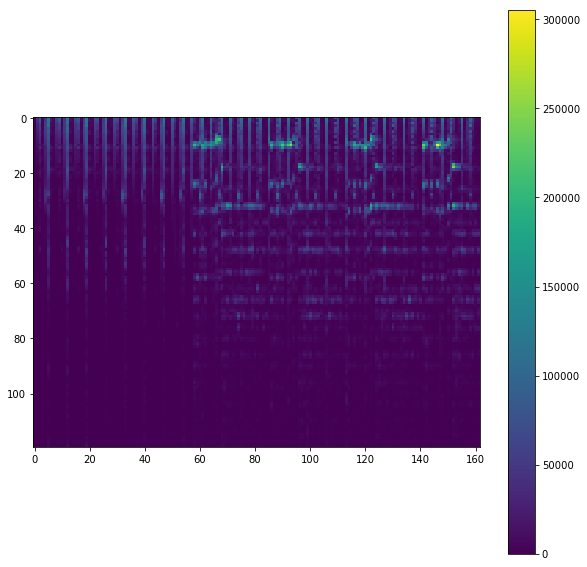

In [30]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(np.abs(cqts))
plt.colorbar()
plt.show()
fig.savefig('cqt.jpg')

In [31]:
#Calculating CQT hip by hop
[a,b]  =librosa.filters.constant_q(sampleRate,  fmin = fMin, n_bins = nBins, bins_per_octave=nBinsPerOctave)
aa = a.shape[1]
aa = a[:,int(aa/2 - hopSize/2) : int(aa/2 + hopSize/2)]

cqts2 = np.zeros(cqts.shape).astype(np.complex)
for i in tqdm(range(cqts2.shape[1])):
    if ((i+1)*hopSize) >= len(data):
        temp = data[i*hopSize:]
        sample = np.zeros(hopSize).astype(np.complex)
        sample[:len(temp)] = temp
    else:
        sample = data[i*hopSize:(i+1)*hopSize]
    cqts2[:,i] = np.dot(aa,sample.astype(complex)) 
    



  0%|                                                                                          | 0/162 [00:00<?, ?it/s]

 12%|█████████▉                                                                      | 20/162 [00:00<00:00, 195.95it/s]

 23%|██████████████████▎                                                             | 37/162 [00:00<00:00, 179.93it/s]

 32%|█████████████████████████▋                                                      | 52/162 [00:00<00:00, 168.45it/s]

 43%|██████████████████████████████████▌                                             | 70/162 [00:00<00:00, 169.79it/s]

 52%|█████████████████████████████████████████▍                                      | 84/162 [00:00<00:00, 163.95it/s]

 61%|████████████████████████████████████████████████▉                               | 99/162 [00:00<00:00, 161.13it/s]

 70%|███████████████████████████████████████████████████████▌                       | 114/162 [00:00<00:00, 158.89it/s]

 79%|██████████████████████████████████████████████████████████████▍                | 128/162 [00:00<00:00, 151.47it/s]

 88%|█████████████████████████████████████████████████████████████████████▋         | 143/162 [00:00<00:00, 150.59it/s]

 98%|█████████████████████████████████████████████████████████████████████████████  | 158/162 [00:01<00:00, 150.09it/s]

100%|███████████████████████████████████████████████████████████████████████████████| 162/162 [00:01<00:00, 149.35it/s]

To make the calculation of CQT easy in our JavaScript aplet, we will calculate the CQT transforms by multiplying the sample with a kernel bank. Here we calculate the kernel bank and then the CQT transform of the same dataset.

Differences against the figure above are possibly due to the fact that the above algorithm smooths the CQT transform. (?)

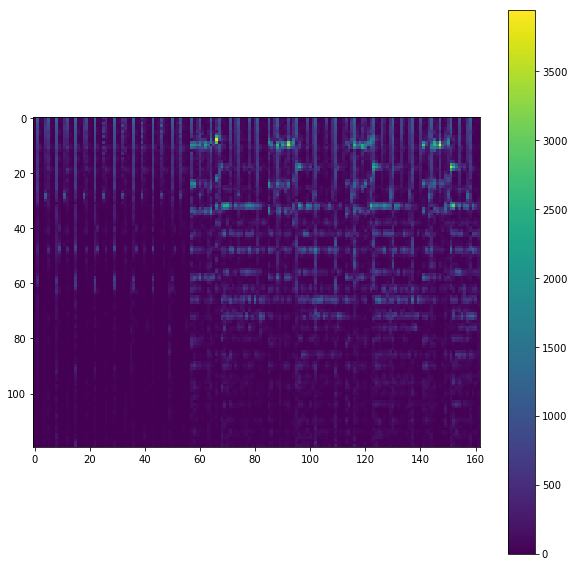

In [38]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(np.abs(cqts2))
plt.colorbar()
plt.show()
fig.savefig('cqt_hop_by_hop.jpg')

Here we plot also the filter bank.
Note how the length of different kernels vary in the function of the detected frequency.

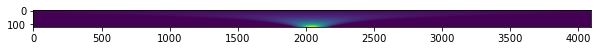

In [42]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(np.abs(aa))
plt.show()